In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import pandas as pd
from stockpy.neural_network import LSTM, GRU, BiGRU, BiLSTM, MLP
from stockpy.probabilistic import BayesianNN, GaussianHMM, DeepMarkovModel

/home/silvio/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# set style of graphs
plt.style.use('seaborn')
from pylab import rcParams
plt.rcParams['figure.dpi'] = 100

/tmp/ipykernel_1477/1194443637.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
df = pd.read_csv('../stock/AAPL.csv', parse_dates=True, index_col='Date').dropna(how="any")
X_train, X_test = train_test_split(df, test_size=0.1, shuffle=False)

In [4]:
predictor = DeepMarkovModel()
predictor.fit(X_train, 
              batch_size=24, 
              epochs=10,
              patience=2
              )

  0%|          | 0/10 [00:00<?, ?it/s]

In [5]:
y_pred = predictor.predict(X_test)
y_test = (X_test['Close']).values.reshape(-1,1)

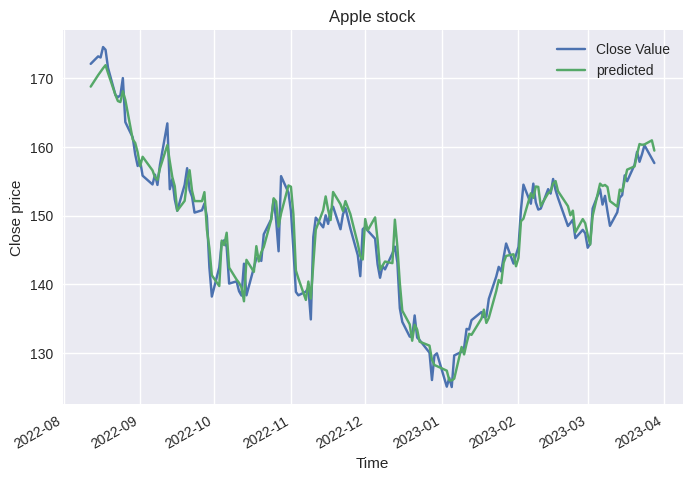

In [6]:
fig, ax = plt.subplots()
days = X_test.index
ax.plot(days, y_test, label='Close Value')
ax.plot(days, y_pred, label='predicted')
ax.set_title('Apple stock')
ax.set_xlabel('Time')
ax.set_ylabel('Close price')
fig.autofmt_xdate()
ax.legend()
# plt.savefig('apple_stock.png', dpi=150)
plt.show()